In [2]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
heart=pd.read_csv('smote_outlier.csv')

In [5]:
heart

age  sex  cp  trest_sbp  trest_dbp  fbs  chol  restecg  thalach  exang  \
0      51    1   0        110         82    0   220        0      166      0   
1      46    0   1        123         84    0   204        1      172      0   
2      57    0   1        109         75    0   231        0      173      0   
3      57    0   1        110         80    1   189        0      157      0   
4      41    0   2        128         86    0   190        1      177      0   
...   ...  ...  ..        ...        ...  ...   ...      ...      ...    ...   
1191   53    0   1        110         69    0   216        1      146      0   
1192   67    1   2        111         81    0   212        0      150      0   
1193   58    0   1        130         83    1   149        1      138      1   
1194   39    1   2        141        101    0   230        1      180      0   
1195   64    1   0        129         89    0   212        0      132      0   

      ...  slope  smoking  bmi  fh  sob  palp  ca  thal  stroke  target  
0     ...      0        0    2   1    1     0   0     0       0       0  
1     ...      1        0    1   1    1     1   2     2       0       1  
2     ...      0        0    1   0    0     0   1     1       0       0  
3     ...      0        0    2   0    1     0   0     0       0       0  
4     ...      0        0    1   0    0     1   0     1       0       1  
...   ...    ...      ...  ...  ..  ...   ...  ..   ...     ...     ...  
1191  ...      1        0    1   0    0     0   0     2       0       1  
1192  ...      1        0    1   0    1     1   0     2       0       0  
1193  ...      1        0    1   0    0     0   0     2       0       1  
1194  ...      0        0    1   0    0     0   0     1       0       0  
1195  ...      1        0    2   0    0     0   2     0       0       0  

[1196 rows x 21 columns]

In [6]:
info = ["age", 
        "1: male, 0: female",
        "chest pain type, asymptomatic: 0, atypical angina: 1, non-anginal pain: 2, typical angina: 3",
        "systolic blood pressure",
        "diastolic blood pressure",
        "fasting blood sugar > 120 mg/dl",
        "cholesterol in mg/dl",
        "resting electrocardiographic results, normal = 0, ST-T wave = 1, LVH = 2",
        "maximum heart rate achieved",
        "exercise-induced angina",
        "old peak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment, upsloping = 0, flat = 1, downsloping =2",
        "smoke",
        "obesity, underweight =0, normal weight =1, overweight =2, obese = 3",
        "family history",
        "shortness of breath",
        "palpitation",
        "number of major vessels (0-3) colored by fluoroscopy",
        "thalassemia: 0 = normal; 1 = fixed defect; 2 = reversible defect",
        "condition where brain can't get enough blood flow"]


for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, asymptomatic: 0, atypical angina: 1, non-anginal pain: 2, typical angina: 3
trest_sbp:			systolic blood pressure
trest_dbp:			diastolic blood pressure
fbs:			fasting blood sugar > 120 mg/dl
chol:			cholesterol in mg/dl
restecg:			resting electrocardiographic results, normal = 0, ST-T wave = 1, LVH = 2
thalach:			maximum heart rate achieved
exang:			exercise-induced angina
oldpeak:			old peak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment, upsloping = 0, flat = 1, downsloping =2
smoking:			smoke
bmi:			obesity, underweight =0, normal weight =1, overweight =2, obese = 3
fh:			family history
sob:			shortness of breath
palp:			palpitation
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thalassemia: 0 = normal; 1 = fixed defect; 2 = reversible defect
stroke:			condition where brain can't get enough blood flow


In [7]:
heart['target']

0       0
1       1
2       0
3       0
4       1
       ..
1191    1
1192    0
1193    1
1194    0
1195    0
Name: target, Length: 1196, dtype: int64

In [8]:
heart.groupby('target').size()

target
0    598
1    598
dtype: int64

In [9]:
heart.groupby('target').sum()

age  sex   cp  trest_sbp  trest_dbp  fbs    chol  restecg  thalach  \
target                                                                         
0       31062  335  489      75818      50947  108  132580      170    89147   
1       31728  268  918      74287      49462  184  130007      577    82581   

        exang  oldpeak  slope  smoking  bmi   fh  sob  palp   ca  thal  stroke  
target                                                                          
0         100   669.25    331        0  635  127  154    95  201   343       0  
1         134   888.95    631        0  772  151  278   251  458   904       0

In [10]:
heart.shape

(1196, 21)

In [11]:
heart.size

25116

In [12]:
heart.describe()

age          sex           cp    trest_sbp    trest_dbp  \
count  1196.000000  1196.000000  1196.000000  1196.000000  1196.000000   
mean     52.500000     0.504181     1.176421   125.505853    83.954013   
std       9.589874     0.500192     1.062001    15.333966    10.879810   
min      29.000000     0.000000     0.000000    90.000000    60.000000   
25%      45.000000     0.000000     0.000000   114.000000    77.000000   
50%      53.000000     1.000000     1.000000   125.000000    83.000000   
75%      59.000000     1.000000     2.000000   136.000000    91.000000   
max      74.000000     1.000000     3.000000   169.000000   111.000000   

               fbs         chol      restecg      thalach        exang  ...  \
count  1196.000000  1196.000000  1196.000000  1196.000000  1196.000000  ...   
mean      0.244147   219.554348     0.624582   143.585284     0.195652  ...   
std       0.429760    43.083450     0.613950    19.781913     0.396868  ...   
min       0.000000   122.000000     0.000000    87.000000     0.000000  ...   
25%       0.000000   188.000000     0.000000   129.000000     0.000000  ...   
50%       0.000000   216.500000     1.000000   145.000000     0.000000  ...   
75%       0.000000   248.000000     1.000000   157.000000     0.000000  ...   
max       1.000000   338.000000     2.000000   195.000000     1.000000  ...   

             slope  smoking          bmi           fh          sob  \
count  1196.000000   1196.0  1196.000000  1196.000000  1196.000000   
mean      0.804348      0.0     1.176421     0.232441     0.361204   
std       0.664848      0.0     0.547169     0.422566     0.480550   
min       0.000000      0.0     0.000000     0.000000     0.000000   
25%       0.000000      0.0     1.000000     0.000000     0.000000   
50%       1.000000      0.0     1.000000     0.000000     0.000000   
75%       1.000000      0.0     1.000000     0.000000     1.000000   
max       2.000000      0.0     3.000000     1.000000     1.000000   

              palp           ca         thal  stroke       target  
count  1196.000000  1196.000000  1196.000000  1196.0  1196.000000  
mean      0.289298     0.551003     1.042642     0.0     0.500000  
std       0.453626     0.788987     0.825749     0.0     0.500209  
min       0.000000     0.000000     0.000000     0.0     0.000000  
25%       0.000000     0.000000     0.000000     0.0     0.000000  
50%       0.000000     0.000000     1.000000     0.0     0.500000  
75%       1.000000     1.000000     2.000000     0.0     1.000000  
max       1.000000     2.000000     2.000000     0.0     1.000000  

[8 rows x 21 columns]

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1196 non-null   int64  
 1   sex        1196 non-null   int64  
 2   cp         1196 non-null   int64  
 3   trest_sbp  1196 non-null   int64  
 4   trest_dbp  1196 non-null   int64  
 5   fbs        1196 non-null   int64  
 6   chol       1196 non-null   int64  
 7   restecg    1196 non-null   int64  
 8   thalach    1196 non-null   int64  
 9   exang      1196 non-null   int64  
 10  oldpeak    1196 non-null   float64
 11  slope      1196 non-null   int64  
 12  smoking    1196 non-null   int64  
 13  bmi        1196 non-null   int64  
 14  fh         1196 non-null   int64  
 15  sob        1196 non-null   int64  
 16  palp       1196 non-null   int64  
 17  ca         1196 non-null   int64  
 18  thal       1196 non-null   int64  
 19  stroke     1196 non-null   int64  
 20  target  

In [14]:
heart['target'].unique()

array([0, 1], dtype=int64)

# **EDA (Visualization)**

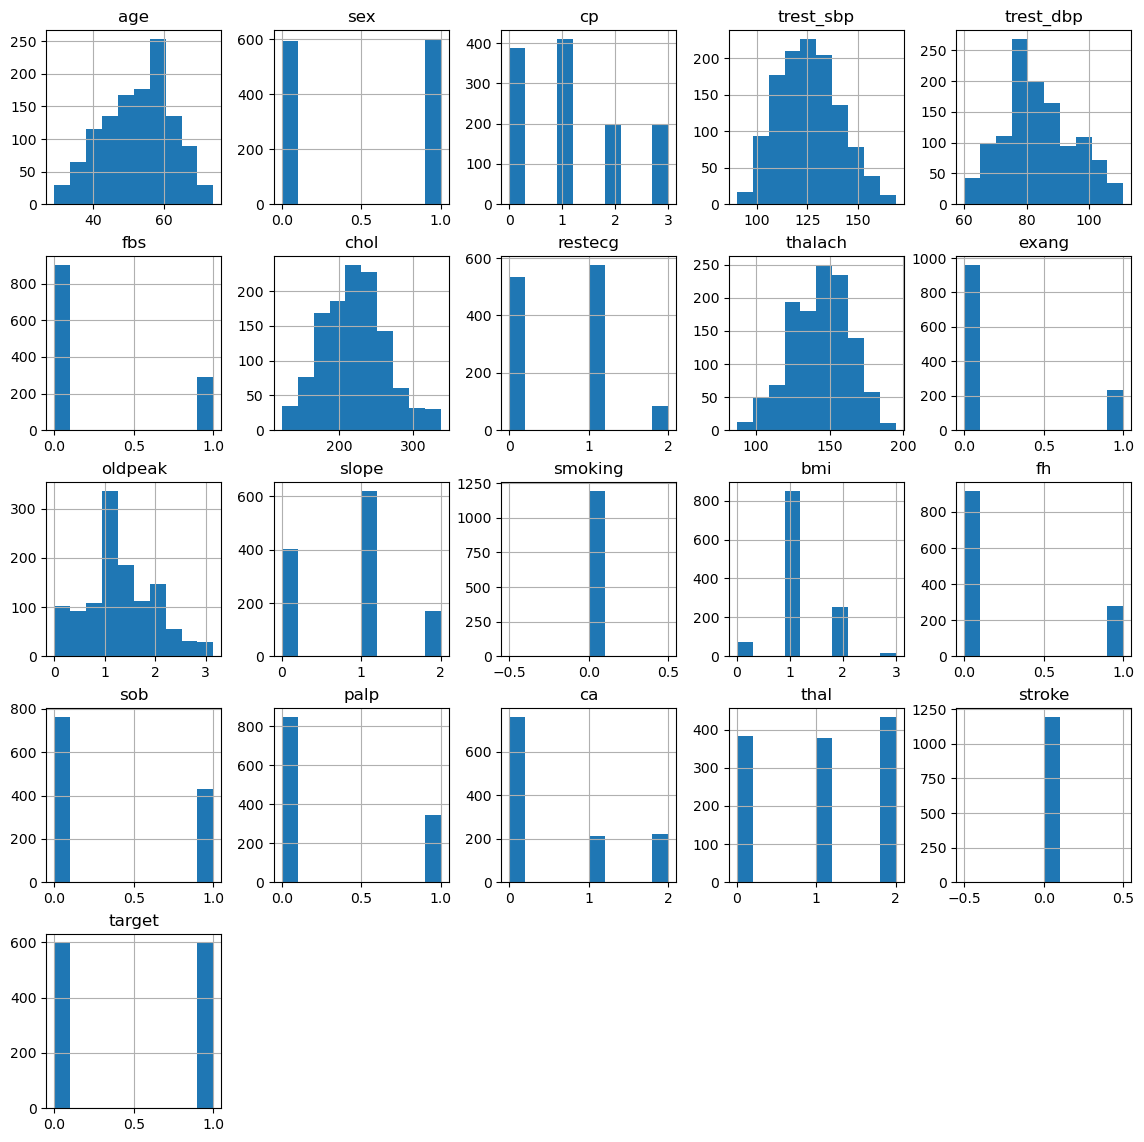

In [15]:
heart.hist(figsize=(14,14))
plt.show()

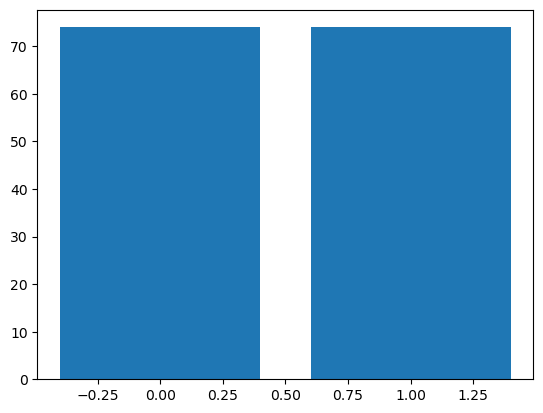

In [16]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

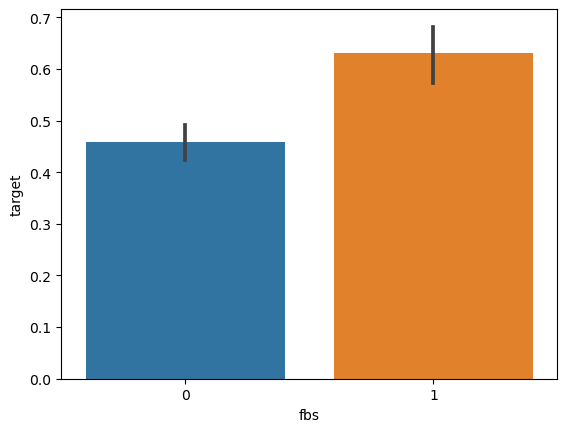

In [17]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()

<Axes: xlabel='sex', ylabel='age'>

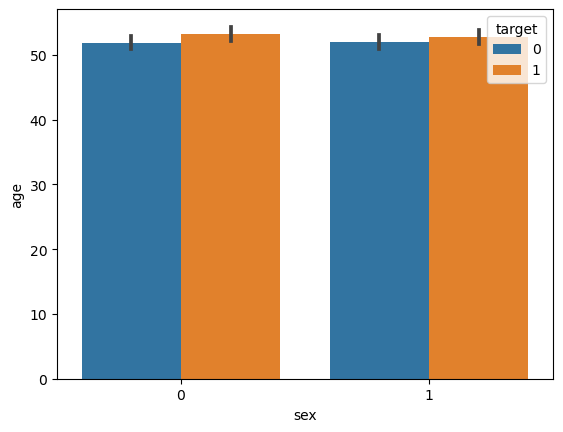

In [18]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

<Axes: xlabel='cp', ylabel='target'>

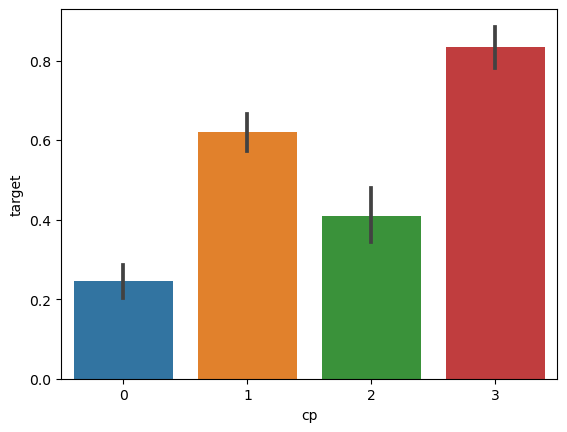

In [19]:
#sns.barplot(heart["cp"],heart['target'])
sns.barplot(x='cp', y='target', data=heart)

<Axes: xlabel='sex', ylabel='target'>

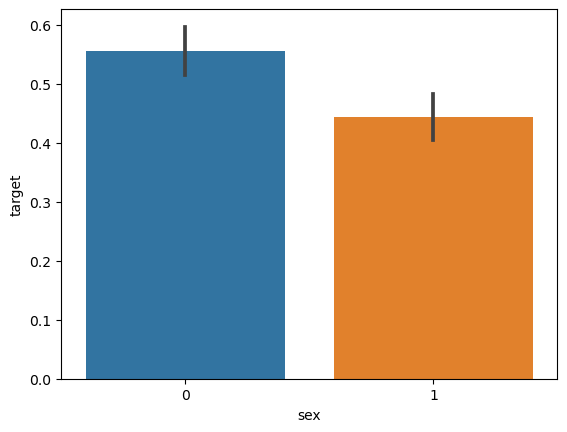

In [20]:
#sns.barplot(heart["sex"],heart['target'])
sns.barplot(x='sex', y='target', data=heart)

C:\Users\USER\AppData\Local\Temp\ipykernel_23744\884938407.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='thal', ylabel='Density'>

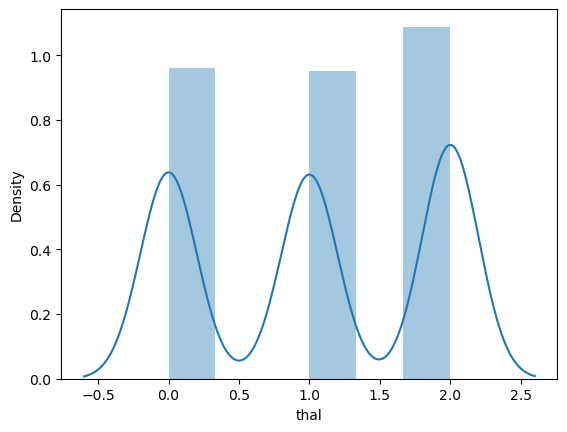

In [21]:
sns.distplot(heart["thal"])

C:\Users\USER\AppData\Local\Temp\ipykernel_23744\2909701137.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='chol', ylabel='Density'>

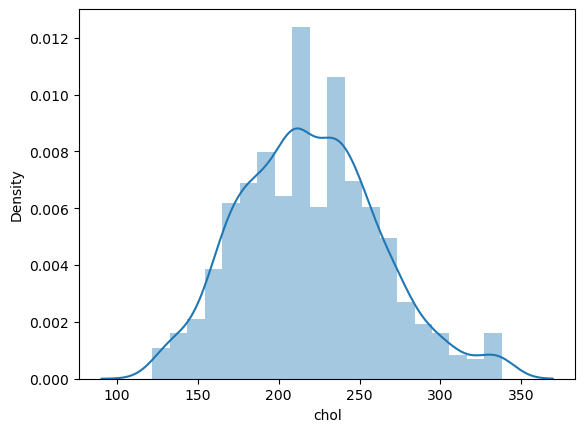

In [22]:
sns.distplot(heart["chol"])

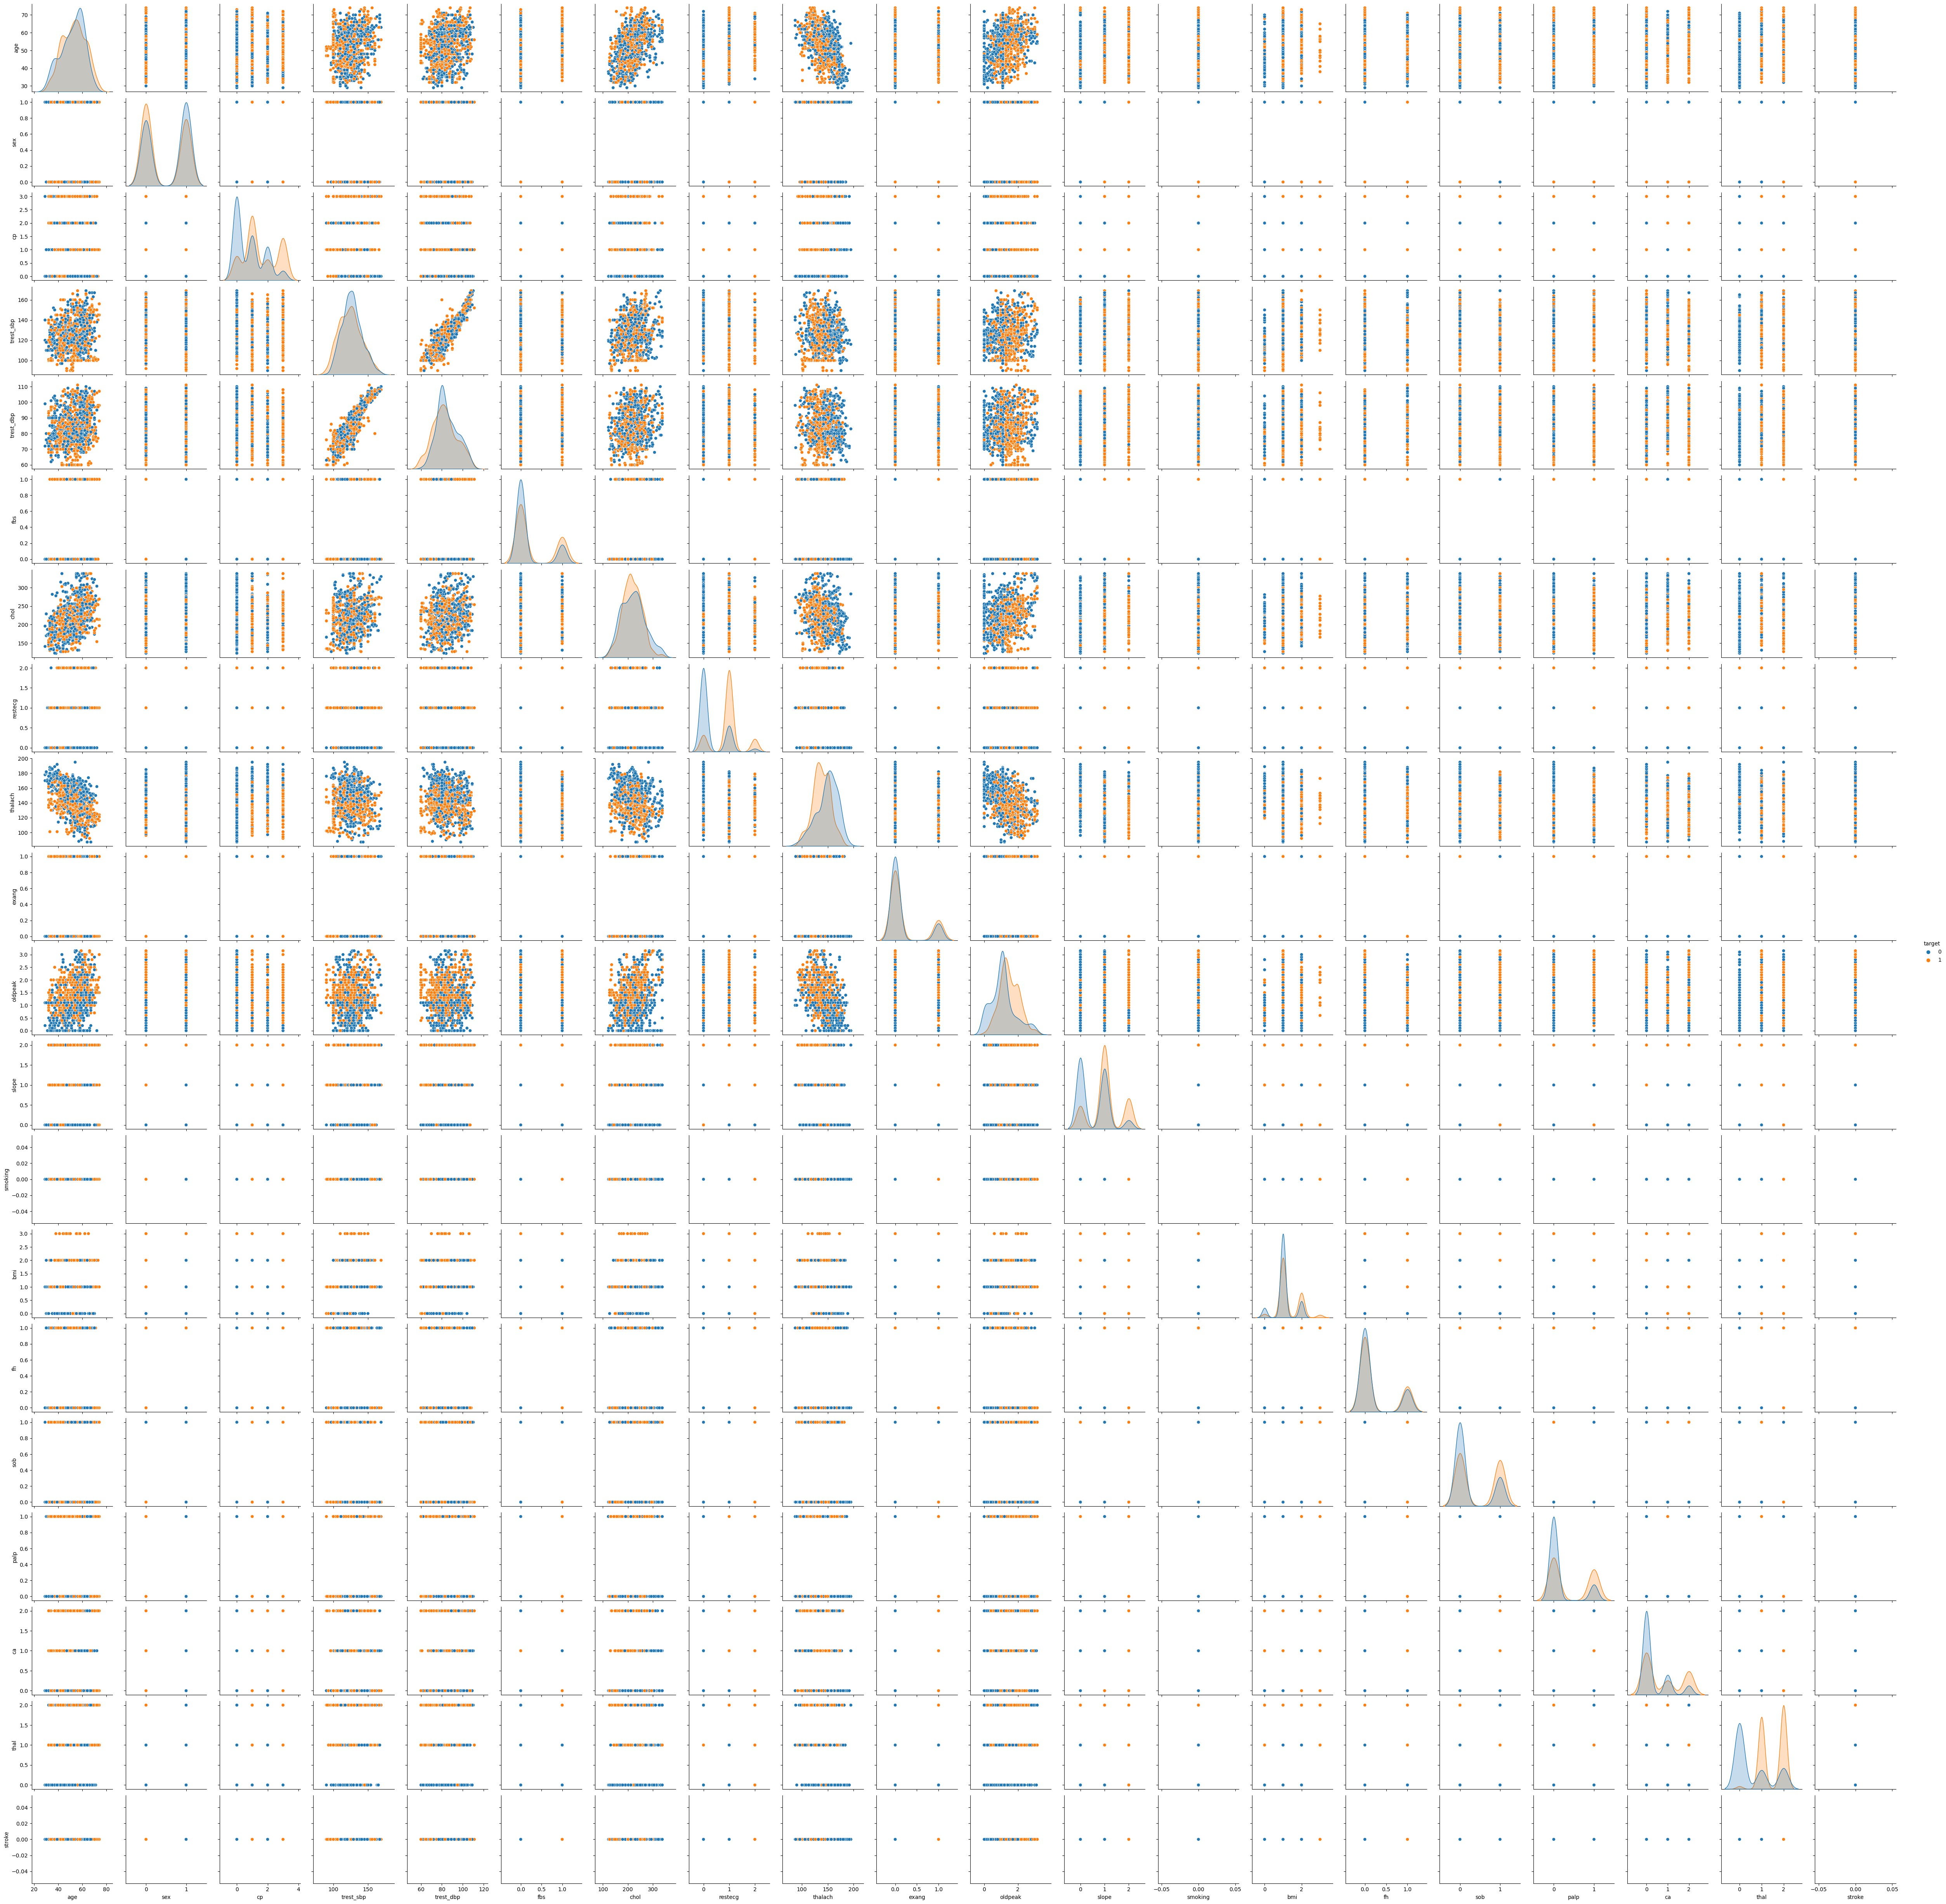

In [23]:
sns.pairplot(heart,hue='target')

In [24]:
heart

age  sex  cp  trest_sbp  trest_dbp  fbs  chol  restecg  thalach  exang  \
0      51    1   0        110         82    0   220        0      166      0   
1      46    0   1        123         84    0   204        1      172      0   
2      57    0   1        109         75    0   231        0      173      0   
3      57    0   1        110         80    1   189        0      157      0   
4      41    0   2        128         86    0   190        1      177      0   
...   ...  ...  ..        ...        ...  ...   ...      ...      ...    ...   
1191   53    0   1        110         69    0   216        1      146      0   
1192   67    1   2        111         81    0   212        0      150      0   
1193   58    0   1        130         83    1   149        1      138      1   
1194   39    1   2        141        101    0   230        1      180      0   
1195   64    1   0        129         89    0   212        0      132      0   

      ...  slope  smoking  bmi  fh  sob  palp  ca  thal  stroke  target  
0     ...      0        0    2   1    1     0   0     0       0       0  
1     ...      1        0    1   1    1     1   2     2       0       1  
2     ...      0        0    1   0    0     0   1     1       0       0  
3     ...      0        0    2   0    1     0   0     0       0       0  
4     ...      0        0    1   0    0     1   0     1       0       1  
...   ...    ...      ...  ...  ..  ...   ...  ..   ...     ...     ...  
1191  ...      1        0    1   0    0     0   0     2       0       1  
1192  ...      1        0    1   0    1     1   0     2       0       0  
1193  ...      1        0    1   0    0     0   0     2       0       1  
1194  ...      0        0    1   0    0     0   0     1       0       0  
1195  ...      1        0    2   0    0     0   2     0       0       0  

[1196 rows x 21 columns]

In [25]:
numeric_columns=['trest_sbp', 'trest_dbp', 'chol', 'thalach', 'age','oldpeak']

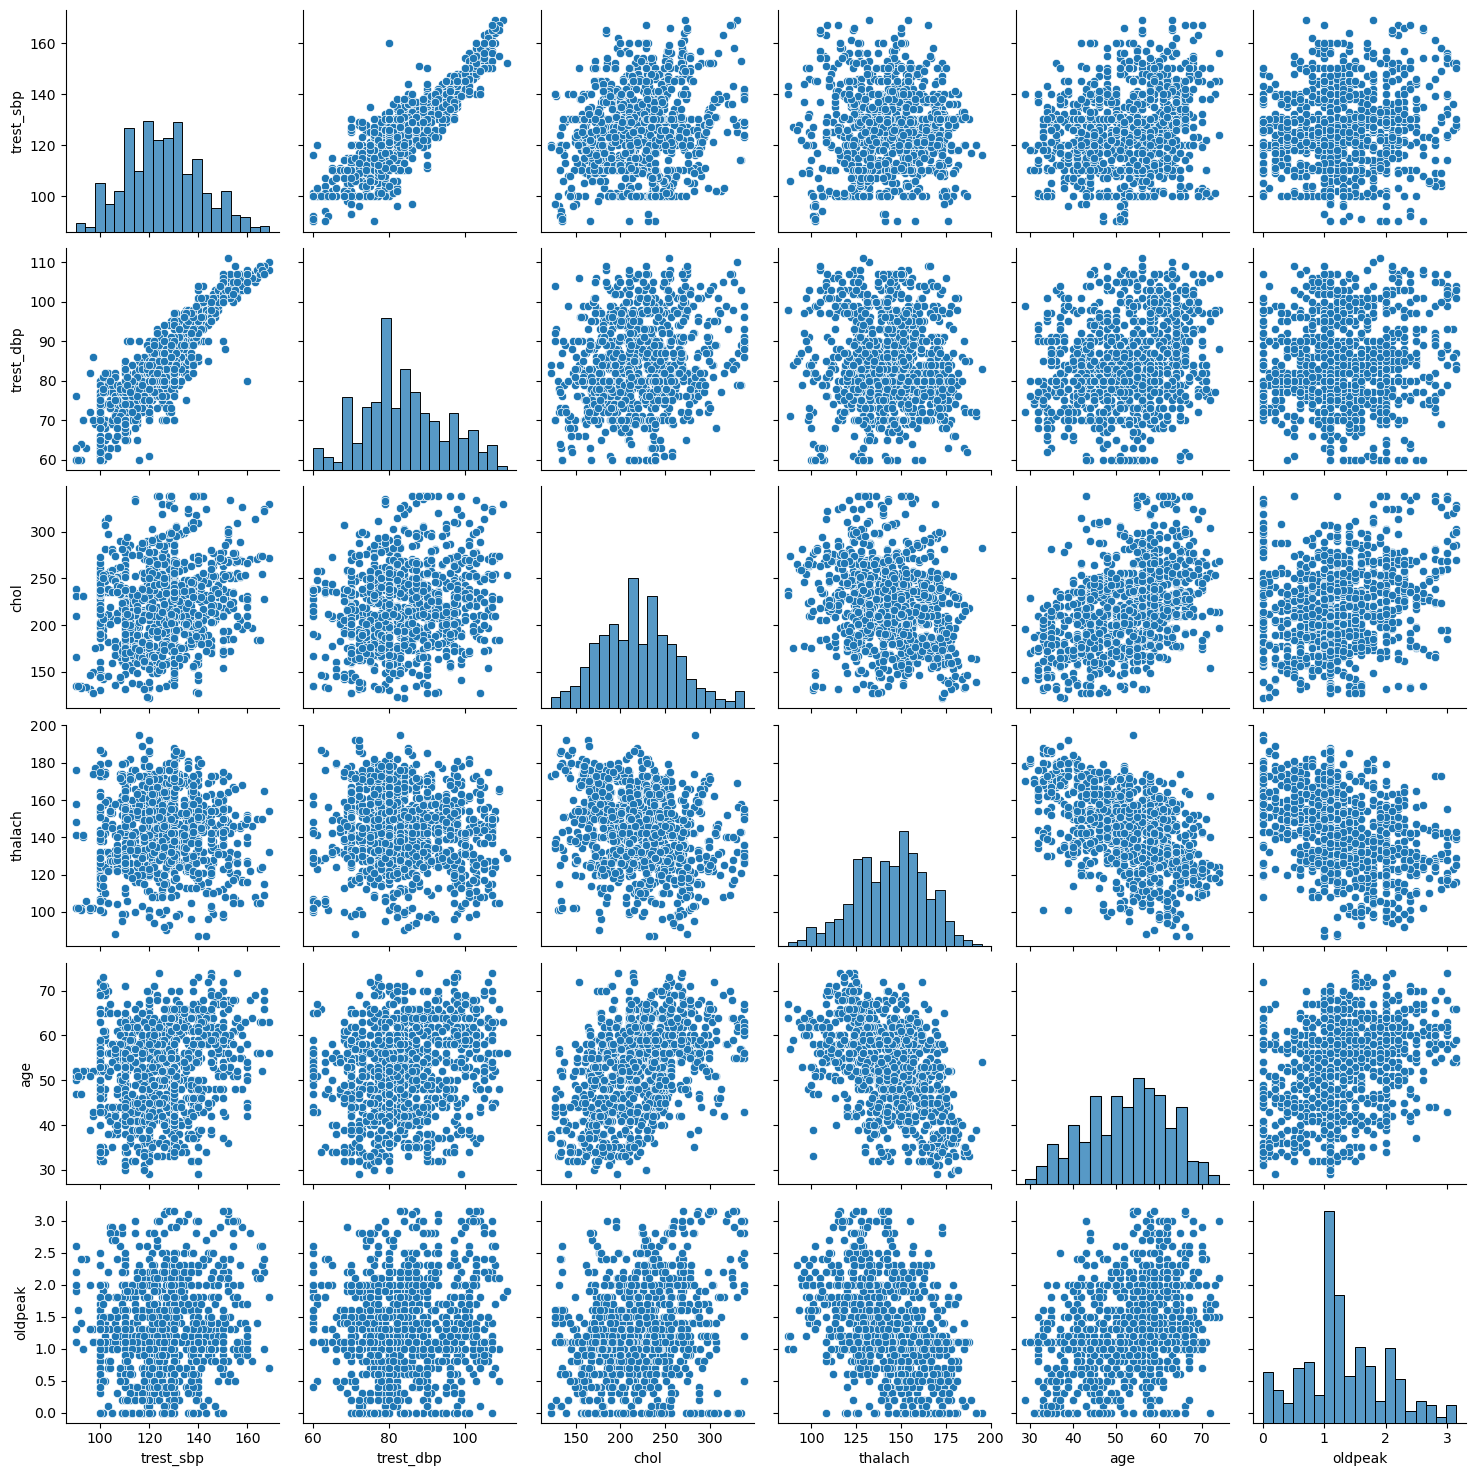

In [26]:
sns.pairplot(heart[numeric_columns])

In [27]:
heart['target']

0       0
1       1
2       0
3       0
4       1
       ..
1191    1
1192    0
1193    1
1194    0
1195    0
Name: target, Length: 1196, dtype: int64

0    598
1    598
Name: target, dtype: int64


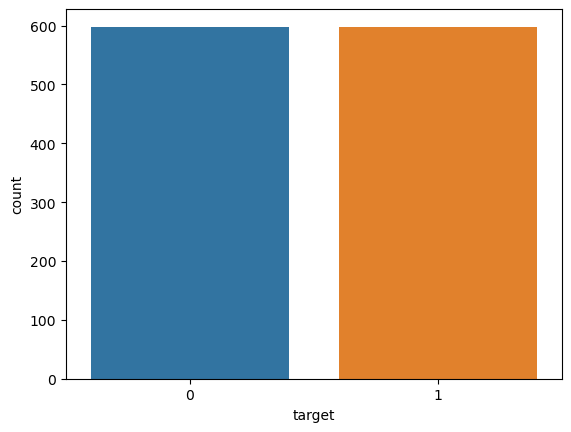

In [28]:
y = heart["target"]

#sns.countplot(y)
sns.countplot(data=heart, x="target")

target_temp = heart.target.value_counts()

print(target_temp)

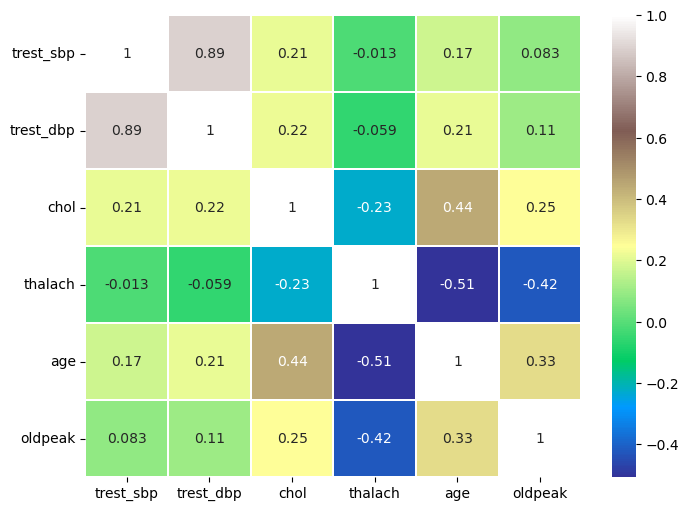

In [29]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23744\2929698976.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USER\AppData\Local\Temp\ipykernel_23744\2929698976.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USER\AppData\Local\Temp\ipykernel_23744\2929698976.py:10: UserWarning:



`distplot` is a

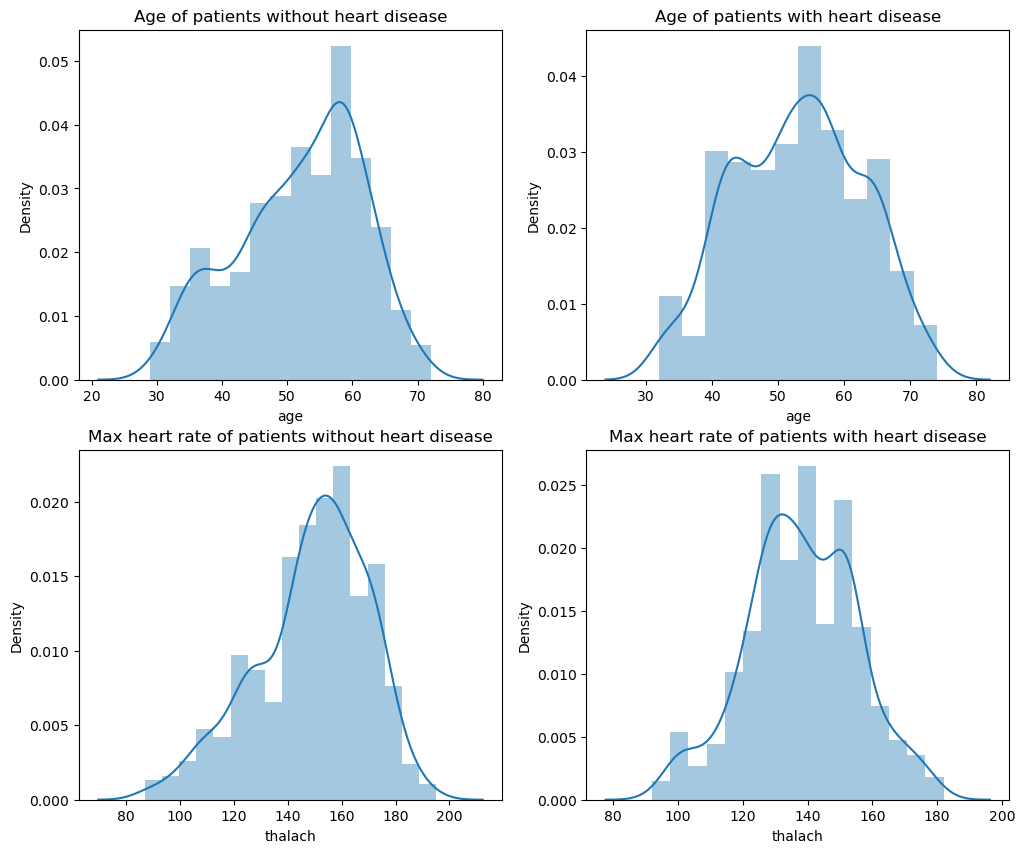

In [30]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

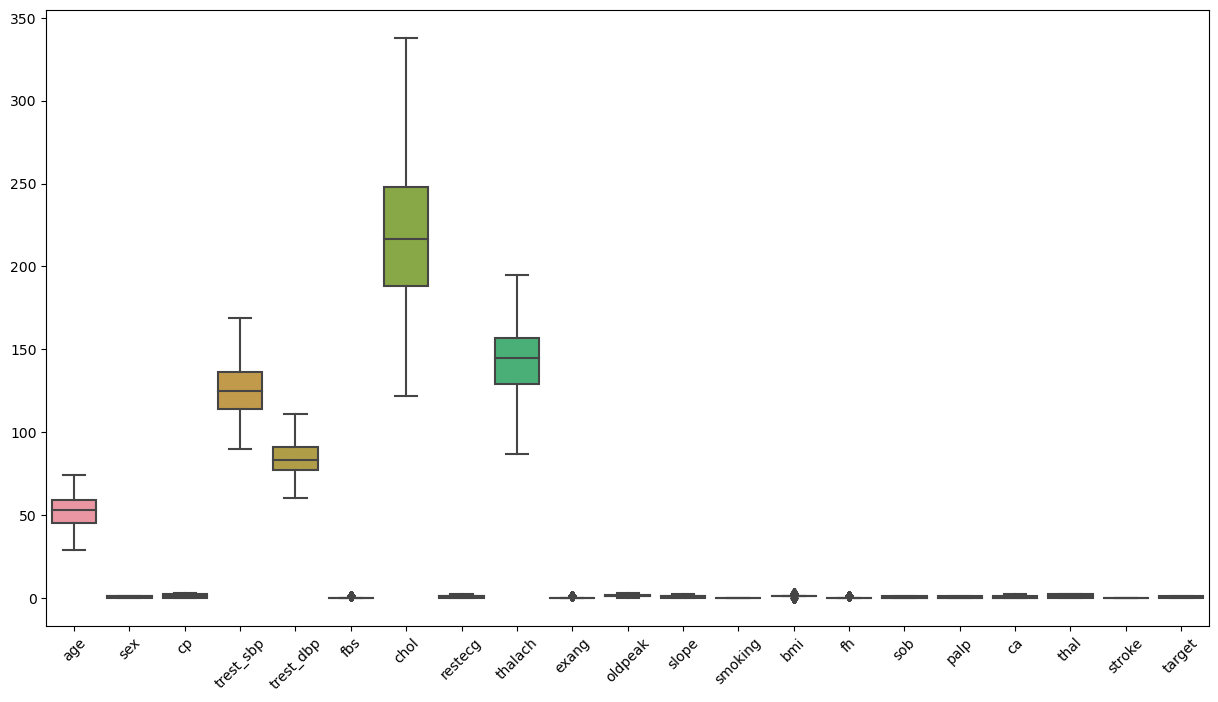

In [31]:
#outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=heart)
plt.xticks(rotation=45)
plt.show()

In [32]:
heart

age  sex  cp  trest_sbp  trest_dbp  fbs  chol  restecg  thalach  exang  \
0      51    1   0        110         82    0   220        0      166      0   
1      46    0   1        123         84    0   204        1      172      0   
2      57    0   1        109         75    0   231        0      173      0   
3      57    0   1        110         80    1   189        0      157      0   
4      41    0   2        128         86    0   190        1      177      0   
...   ...  ...  ..        ...        ...  ...   ...      ...      ...    ...   
1191   53    0   1        110         69    0   216        1      146      0   
1192   67    1   2        111         81    0   212        0      150      0   
1193   58    0   1        130         83    1   149        1      138      1   
1194   39    1   2        141        101    0   230        1      180      0   
1195   64    1   0        129         89    0   212        0      132      0   

      ...  slope  smoking  bmi  fh  sob  palp  ca  thal  stroke  target  
0     ...      0        0    2   1    1     0   0     0       0       0  
1     ...      1        0    1   1    1     1   2     2       0       1  
2     ...      0        0    1   0    0     0   1     1       0       0  
3     ...      0        0    2   0    1     0   0     0       0       0  
4     ...      0        0    1   0    0     1   0     1       0       1  
...   ...    ...      ...  ...  ..  ...   ...  ..   ...     ...     ...  
1191  ...      1        0    1   0    0     0   0     2       0       1  
1192  ...      1        0    1   0    1     1   0     2       0       0  
1193  ...      1        0    1   0    0     0   0     2       0       1  
1194  ...      0        0    1   0    0     0   0     1       0       0  
1195  ...      1        0    2   0    0     0   2     0       0       0  

[1196 rows x 21 columns]

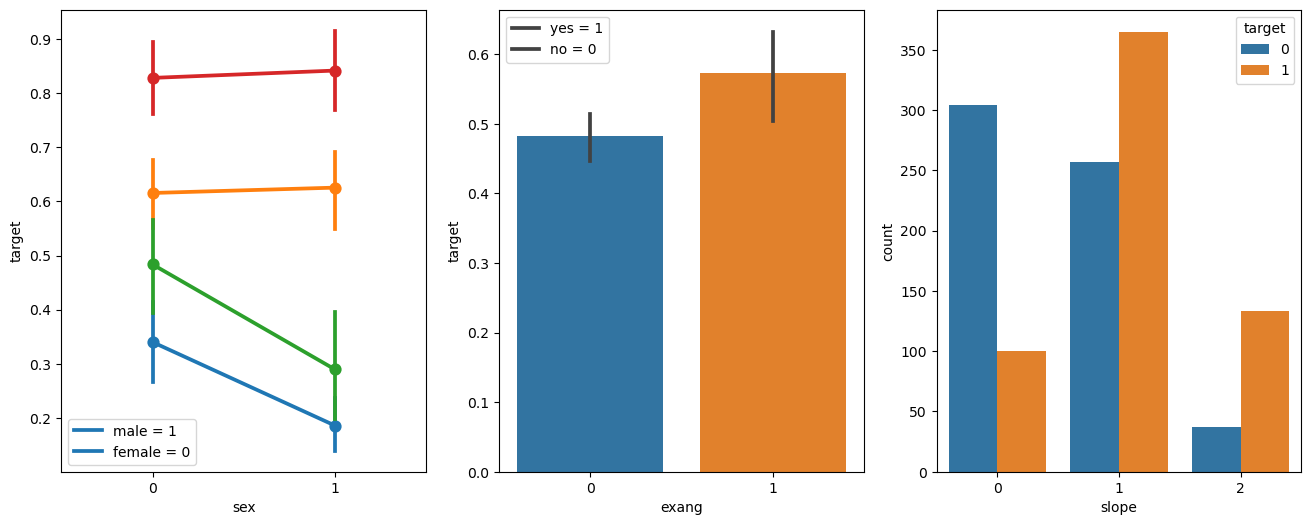

In [33]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

In [34]:
heart['target'].value_counts()

0    598
1    598
Name: target, dtype: int64

In [35]:
heart['target'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1191    False
1192    False
1193    False
1194    False
1195    False
Name: target, Length: 1196, dtype: bool

In [36]:
heart['target'].sum()

598

In [37]:
heart['target'].unique()

array([0, 1], dtype=int64)

In [38]:
heart.isnull().sum()

age          0
sex          0
cp           0
trest_sbp    0
trest_dbp    0
fbs          0
chol         0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
smoking      0
bmi          0
fh           0
sob          0
palp         0
ca           0
thal         0
stroke       0
target       0
dtype: int64

# **Storing in X and y**

In [39]:
X,y=heart,heart.target

In [40]:
X.drop('target',axis=1,inplace=True)

In [41]:
X.shape

(1196, 20)

In [42]:
y.shape

(1196,)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# **Split the data into training and testing sets**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3, shuffle=True)

In [45]:
X_train.shape

(837, 20)

In [46]:
X_test.shape

(359, 20)

In [47]:
y_train.shape

(837,)

In [48]:
y_test.shape

(359,)

In [49]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (837, 20)
train_set_y shape: (837,)
test_set_x shape: (359, 20)
test_set_y shape: (359,)


# **Models**

In [50]:
# Decision Tree Classifier
scores_dict = {}
Catagory=['No Heart Disease', 'Heart Disease Detected']
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize DecisionTreeClassifier with a fixed random state
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

prediction = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, prediction) * 100
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

X_DT = np.array([[53, 1, 1, 132, 89, 0, 203, 0, 155, 1, 2.2, 0, 0, 2, 0, 0, 1, 3, 2, 0]])
X_DT_prediction = dt.predict(X_DT)
print(Catagory[int(X_DT_prediction[0])])

Accuracy on test set: 0.911
No Heart Disease


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [98]:
# Dictionary to store accuracy scores for each classifier
scores_dict = {}

# Function to train and evaluate a classifier
def train_evaluate_classifier(classifier, classifier_name, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)

    scores_dict[classifier_name] = accuracy

    print(f"\n{classifier_name}:")
    print("Accuracy on test set: {:.3f}".format(accuracy))
    print("Precision on test set: {:.3f}".format(precision))
    print("Recall on test set: {:.3f}".format(recall))
    print("Confusion Matrix:")
    print(confusion_mat)

    # Predict for a specific sample (change X_DT accordingly)
    X_DT = np.array([[68, 0, 3, 152, 107, 0, 190, 0, 115, 1, 3, 2, 0, 1, 0, 1, 1, 3, 1, 1]]) 
    X_DT_prediction = classifier.predict(X_DT)
    print(f"Prediction for the specific sample: {int(X_DT_prediction[0])}")

In [99]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
train_evaluate_classifier(dt, 'DecisionTreeClassifier', X_train, y_train, X_test, y_test)


DecisionTreeClassifier:
Accuracy on test set: 91.086
Precision on test set: 0.897
Recall on test set: 0.927
Confusion Matrix:
[[162  19]
 [ 13 165]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [100]:
# RandomForest
classifier_rf = RandomForestClassifier(random_state=42)
train_evaluate_classifier(classifier_rf, 'RandomForestClassifier', X_train, y_train, X_test, y_test)


RandomForestClassifier:
Accuracy on test set: 94.150
Precision on test set: 0.924
Recall on test set: 0.961
Confusion Matrix:
[[167  14]
 [  7 171]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [101]:
# XGBoost
classifier_xgb = XGBClassifier(random_state=42)
train_evaluate_classifier(classifier_xgb, 'XGBoostClassifier', X_train, y_train, X_test, y_test)


XGBoostClassifier:
Accuracy on test set: 94.708
Precision on test set: 0.934
Recall on test set: 0.961
Confusion Matrix:
[[169  12]
 [  7 171]]
Prediction for the specific sample: 1


In [102]:
# MLP
classifier_mlp = MLPClassifier(random_state=42)
train_evaluate_classifier(classifier_mlp, 'MLPClassifier', X_train, y_train, X_test, y_test)


MLPClassifier:
Accuracy on test set: 89.972
Precision on test set: 0.894
Recall on test set: 0.904
Confusion Matrix:
[[162  19]
 [ 17 161]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names



In [103]:
# Logistic Regression
classifier_lr = LogisticRegression(random_state=42, max_iter=1000)
train_evaluate_classifier(classifier_lr, 'LogisticRegression', X_train, y_train, X_test, y_test)


LogisticRegression:
Accuracy on test set: 89.136
Precision on test set: 0.884
Recall on test set: 0.899
Confusion Matrix:
[[160  21]
 [ 18 160]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [104]:
# KNN
classifier_knn = KNeighborsClassifier()
train_evaluate_classifier(classifier_knn, 'KNNClassifier', X_train, y_train, X_test, y_test)


KNNClassifier:
Accuracy on test set: 75.766
Precision on test set: 0.724
Recall on test set: 0.826
Confusion Matrix:
[[125  56]
 [ 31 147]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [105]:
# Gaussian Naive Bayes
classifier_gnb = GaussianNB()
train_evaluate_classifier(classifier_gnb, 'GaussianNBClassifier', X_train, y_train, X_test, y_test)


GaussianNBClassifier:
Accuracy on test set: 88.301
Precision on test set: 0.878
Recall on test set: 0.888
Confusion Matrix:
[[159  22]
 [ 20 158]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [106]:
# Multinomial Naive Bayes
classifier_mnb = MultinomialNB()
train_evaluate_classifier(classifier_mnb, 'MultinomialNBClassifier', X_train, y_train, X_test, y_test)


MultinomialNBClassifier:
Accuracy on test set: 76.602
Precision on test set: 0.745
Recall on test set: 0.803
Confusion Matrix:
[[132  49]
 [ 35 143]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but MultinomialNB was fitted with feature names



In [107]:
# SVM
classifier_svm = SVC(random_state=42)
train_evaluate_classifier(classifier_svm, 'SVMClassifier', X_train, y_train, X_test, y_test)


SVMClassifier:
Accuracy on test set: 66.574
Precision on test set: 0.665
Recall on test set: 0.657
Confusion Matrix:
[[122  59]
 [ 61 117]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [108]:
# AdaBoost
classifier_adaboost = AdaBoostClassifier(random_state=42)
train_evaluate_classifier(classifier_adaboost, 'AdaBoostClassifier', X_train, y_train, X_test, y_test)


AdaBoostClassifier:
Accuracy on test set: 93.872
Precision on test set: 0.929
Recall on test set: 0.949
Confusion Matrix:
[[168  13]
 [  9 169]]
Prediction for the specific sample: 1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



# **Output final score**

In [109]:
# Printing Overall Accuracy Scores
print("\nOverall Accuracy Scores:")
for classifier_name, accuracy in scores_dict.items():
    print(f"The accuracy score achieved using {classifier_name} is: {accuracy:.3f} %")


Overall Accuracy Scores:
The accuracy score achieved using DecisionTreeClassifier is: 91.086 %
The accuracy score achieved using RandomForestClassifier is: 94.150 %
The accuracy score achieved using XGBoostClassifier is: 94.708 %
The accuracy score achieved using MLPClassifier is: 89.972 %
The accuracy score achieved using LogisticRegression is: 89.136 %
The accuracy score achieved using KNNClassifier is: 75.766 %
The accuracy score achieved using GaussianNBClassifier is: 88.301 %
The accuracy score achieved using MultinomialNBClassifier is: 76.602 %
The accuracy score achieved using SVMClassifier is: 66.574 %
The accuracy score achieved using AdaBoostClassifier is: 93.872 %


# **Comparison of Model Accuracies Across Different Algorithms**


Overall Accuracy Scores:


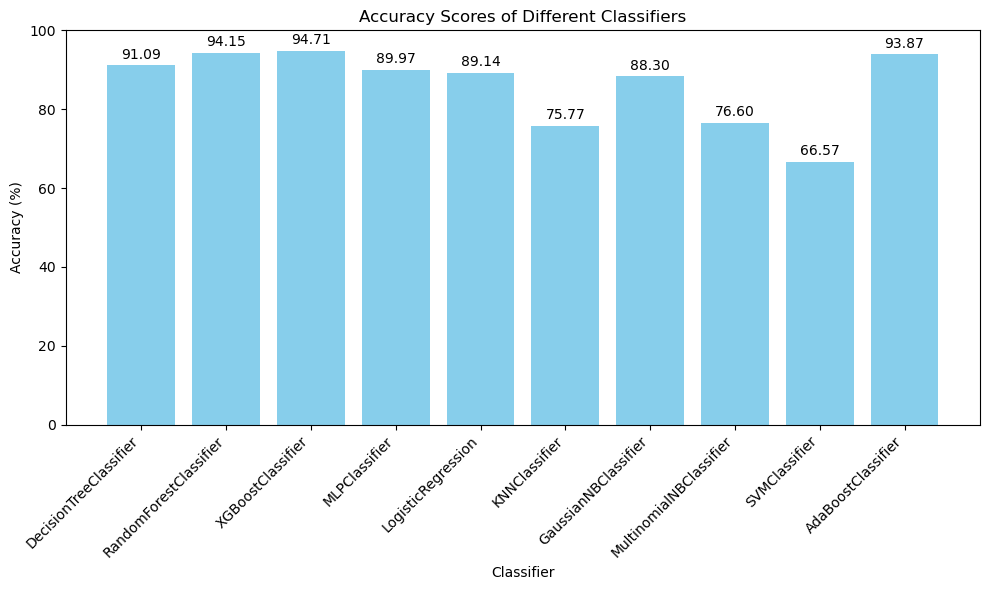

In [110]:
import matplotlib.pyplot as plt

# Printing Overall Accuracy Scores
print("\nOverall Accuracy Scores:")
classifiers = list(scores_dict.keys())
accuracies = list(scores_dict.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Adding the accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# **Exporting Model (XGboost)**

In [113]:
import pickle

# Save the trained XGBoost classifier using pickle
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(classifier_xgb, file)
    
print("XGBoost model saved successfully as", filename)

XGBoost model saved successfully as model.pkl
